# Chapter 2. 試著利用機器學習進行分析
這章要學習執行程式的流程，以便學習機器的基礎。

In [18]:
# #Colaboratory環境的設定
# from google.colab import drive
# drive.mount('/content/drive')
# #切換目錄至範例程式碼的路徑下，你應將其改成你自己的路徑
# %cd /content/drive/MyDrive/Colab Notebooks/醫療決策分析/圖解機器學習與資料科學的數學基礎/Chapter2

## 2-1 計算病人行為模式的相似度

### 載入資料

In [19]:
import pandas as pd
df_info = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

,病人ID,病人姓名,科別,金額
日期,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


### 可視化/視覺化特徵向量（特徵向量為具有時序的使用次數資料）

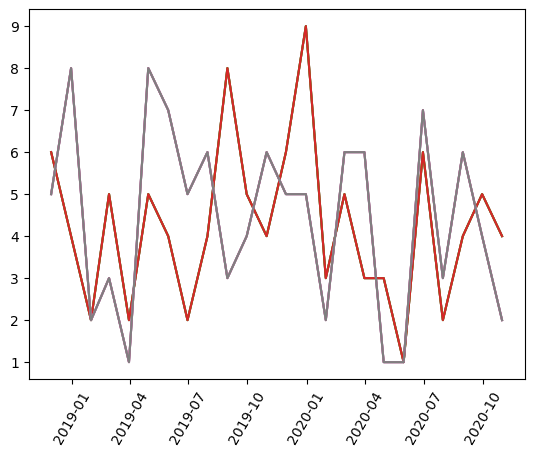

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# 篩選出index
x_0 = df_info.resample('ME').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 設定順位
i_rank = 14
j_rank = 13
# 篩選出病人ID
i_id = df_info['病人ID'].value_counts().index[i_rank]
j_id = df_info['病人ID'].value_counts().index[j_rank]
# 將每月使用次數設定為特徵值
x_i = df_info[df_info['病人ID']==i_id].resample('ME').count()
x_j = df_info[df_info['病人ID']==j_id].resample('ME').count()
# 出現缺失值的處理方式
x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
x_j = pd.concat([x_0, x_j], axis=1).fillna(0)
# 繪製圖表
plt.plot(x_i)
plt.plot(x_j)
plt.xticks(rotation=60)
plt.show()

### 計算相似度

In [21]:
import pandas as pd
import numpy as np
# 計算特徵向量的差距
dx = x_i.iloc[:,0].values-x_j.iloc[:,0].values
# 計算向量範數（距離）
n = np.linalg.norm(dx)
# 利用維度標準化
num_dim = len(x_i)
d = n/num_dim
print("相似度:",d)

相似度: 0.46770717334674267


## 2-3 透過主成分分析確認主要病患的相似程度

### 篩選出特徵向量

In [22]:
import pandas as pd
# 調整index
x_0 = df_info.resample('ME').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 建立陣列
list_vector = []
# 設定人數
num = 100
for i_rank in range(num):
  # 篩選出病人ID
  i_id = df_info['病人ID'].value_counts().index[i_rank]
  # 將每月使用次數設定為特徵值
  x_i = df_info[df_info['病人ID']==i_id].resample('ME').count()
  # 出現缺失值的處理方式
  x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
  # 新增為特徵向量
  list_vector.append(x_i.iloc[:,0].values.tolist())

### 利用主成分分析(PCA)進行可視化/視覺化處理

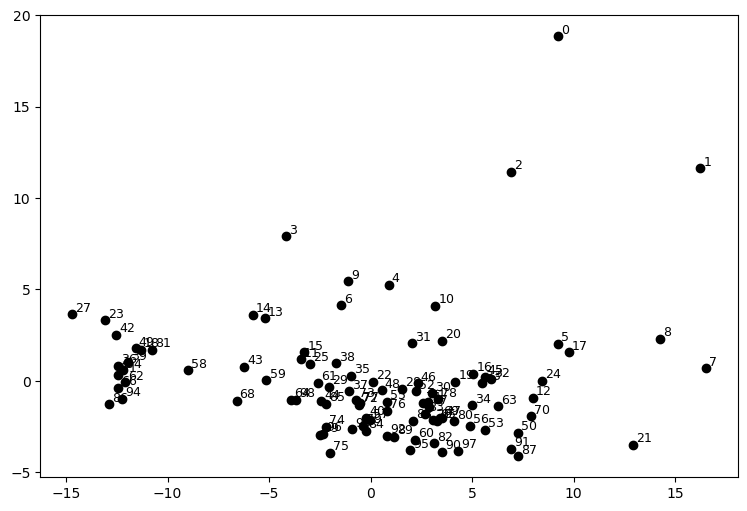

In [23]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# 轉換特徵向量
features = np.array(list_vector)
# 執行主成分分析
pca = PCA()
pca.fit(features)
# 將特徵向量轉換成主成分
transformed = pca.fit_transform(features)
# 調整圖像大小
plt.figure(figsize=(9, 6))
x_offset = 0.15  # x方向位移量(文字進行位移調整)
y_offset = 0.15  # y方向位移量
# 可視化/視覺化
for i in range(len(transformed)):
  plt.scatter(transformed[i,0],transformed[i,1],color="k")
  plt.text(transformed[i, 0] + x_offset, transformed[i, 1] + y_offset, str(i), fontsize=9)
plt.show()

## 2-4. 根據時間軸確認主要病患的行為模式

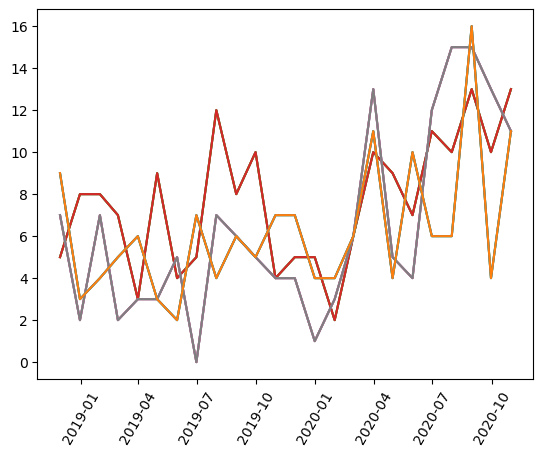

In [24]:
import pandas as pd
# 篩選出index
x_0 = df_info.resample('ME').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)

# 設定順位
list_rank = [0,1,2] #選擇要觀察的三個病患排名序
x = []
for i_rank in list_rank:
    # 篩選出病人ID
    i_id = df_info['病人ID'].value_counts().index[i_rank]
    # 將每月使用次數設定為特徵值
    x_i = df_info[df_info['病人ID']==i_id].resample('ME').count()
    # 出現缺失值的處理方式
    x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
    # 繪製圖表
    plt.plot(x_i)
    plt.xticks(rotation=60)
plt.show()

## 2-5. 透過集群分析可視化/視覺化主要病患的行為模式有何差異

### 利用k-means法進行集群分析

In [25]:
from sklearn.cluster import KMeans
# 設定集群數
num_of_cluster = 4
# 指派集群
model = KMeans(n_clusters=num_of_cluster, random_state=0)
model.fit(features)
pred_class = model.labels_
print(pred_class)

[1 2 1 3 3 1 3 2 2 3 1 3 1 0 3 3 1 2 0 2 1 2 3 0 2 3 1 0 1 3 1 3 1 2 2 3 0
 3 3 0 3 2 0 3 3 2 2 1 3 0 1 0 3 2 0 3 1 3 0 3 1 3 0 2 3 1 0 1 0 2 1 2 3 3
 3 3 3 3 1 3 2 0 1 2 3 3 0 1 2 3 1 2 3 3 0 3 3 1 3 3]


### 結合集群分析結果與主成分分析（PCA）之可視化

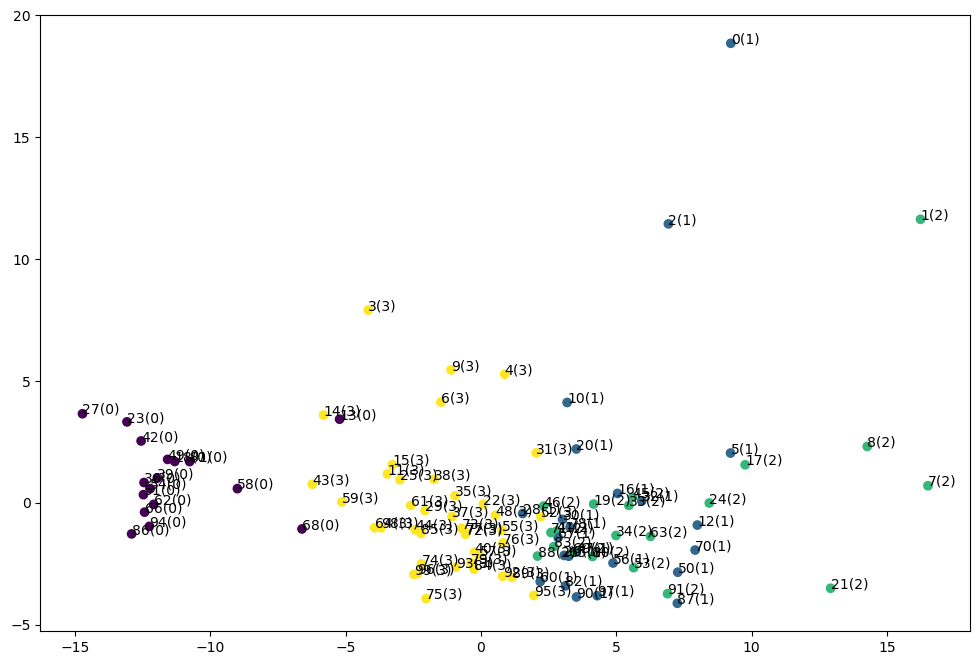

In [26]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 執行主成分分析
pca = PCA()
pca.fit(features)
# 將特徵向量轉換成主成分
transformed = pca.fit_transform(features)
# 可視化/視覺化
plt.figure(figsize=(12, 8))
plt.scatter(transformed[:,0],transformed[:,1],c=pred_class)
for i in range(len(transformed)):
    text = str(i) + "(" + str(pred_class[i]) + ")"
    plt.text(transformed[i,0],transformed[i,1],text)
plt.show()

## 2-6. 利用決策樹推測行為模式的原因

### 設定目標變數

In [27]:
import numpy as np

# 假設 pred_class 和 features 已經定義好
# pred_class 是前面用Kmeans演算法對驗證資料的預測結果()
# features 是特徵變數的 DataFrame
# df_info 是包含時間索引的 DataFrame

# 設定要分析的類別（例如，類別0，代表「疫情爆發前未曾就診或就診次數少，但疫情後就診次數大幅上升的病患」）
target_class = 0

# 建立目標變數
num = len(pred_class)
data_o = np.zeros(num)
for i in range(num):
    if pred_class[i]==target_class:
        data_o[i] = True
    else:
        data_o[i] = False

# 如果 data_o 包含浮點數，嘗試將其轉換為整數
if data_o.dtype == np.float64:
    data_o = data_o.astype(int)  # 將數據類型轉換為整數

print(data_o)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


### 設定說明變數或稱特徵變數

In [28]:
# 建立特徵變數
data_e = features.copy()
print(data_e)

[[ 5.  8.  8. ... 13. 10. 13.]
 [ 7.  2.  7. ... 15. 13. 11.]
 [ 9.  3.  4. ... 16.  4. 11.]
 ...
 [ 0.  3.  2. ...  8.  6.  4.]
 [ 3.  4.  3. ...  6.  1.  3.]
 [ 2.  5.  2. ...  6.  4.  5.]]


### 建立決策樹模型

In [29]:
from sklearn.tree import DecisionTreeClassifier
# 建立決策樹模型
clf = DecisionTreeClassifier(max_depth=2) # max_depth參數決定決策樹的高度/深度
clf = clf.fit(data_e, data_o)

### 輸出視覺化決策樹的結果

In [30]:
# 安裝可視覺化決策樹的函式庫等
!pip install dtreeviz

In [31]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)  #關閉顯示字體錯誤的訊息

In [32]:
# 篩選出index
x_0 = df_info.resample('ME').count()
x_0 = x_0.drop(x_0.columns.values, axis=1)
time_index = x_0.index
print(time_index)

DatetimeIndex(['2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', name='日期', freq='ME')


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


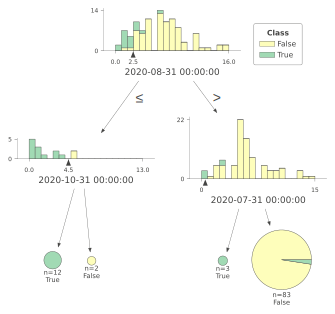

In [33]:
import dtreeviz

# 假設 clf 是你的已訓練好的決策樹分類器，並且 data_e 和 data_o 是你的數據
# 將 time_index 轉換成字串列表
feature_names = [str(t) for t in time_index]

viz = dtreeviz.model(
    clf,          # 決策樹模型
    data_e,       # 特徵數據
    data_o,       # 標籤數據
    target_name='Class',           # 目標名稱
    feature_names=feature_names,  # 使用轉換後的特徵名稱
    class_names=['False', 'True'], # 類別名稱
)

viz.view()  # 顯示視覺化

## 2-7. 可視化/視覺化決策樹的分類結果，評估分類的精確度

In [34]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
# matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# matplotlib.rc('font', family='Taipei Sans TC Beta')

### 決策樹與Kmeans分類結果視覺化

/home/csning1998/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
/home/csning1998/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
/home/csning1998/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
/home/csning1998/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
/home/csning1998/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
/home/csning1998/miniconda3/envs/tf

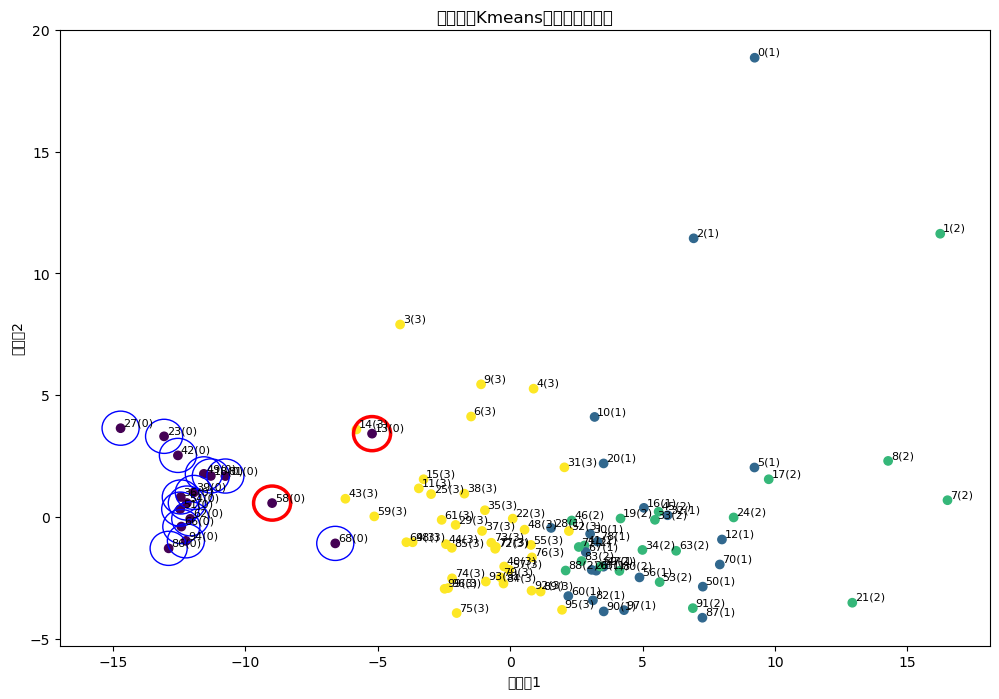

In [35]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat

# 進行分類
pred_tree = clf.predict(data_e)

# 執行主成分分析
pca = PCA()
pca.fit(features)
# 將特徵向量轉換成主成分
transformed = pca.fit_transform(features)
# 可視化/視覺化
plt.figure(figsize=(12, 8))
plt.scatter(transformed[:,0],transformed[:,1],c=pred_class)
for i in range(len(transformed)):
    if pred_tree[i]==True:
        if pred_class[i]==target_class:  #決策樹分類與Kmeans分類一致
            temp_color = "b"
            temp_lw = 1.0
        else:               #決策樹分類為target_class(前面設定為0) 而Kmeans分類並不同一類
            temp_color = "y"
            temp_lw = 2.5
        circle = pat.Circle(xy=(transformed[i,0],transformed[i,1]), radius=0.7, ec=temp_color, fill=False, linewidth = temp_lw)
        #plt.axes().add_artist(circle)
        ax = plt.gca()
        ax.add_patch(circle)
    else:
        if pred_class[i]==target_class:  #決策樹分類不為target_class(前面設定為0) 而Kmeans分類為target_class
            temp_color = "r"
            temp_lw = 2.5
            circle = pat.Circle(xy=(transformed[i,0],transformed[i,1]), radius=0.7, ec=temp_color, fill=False, linewidth = temp_lw)
            #plt.axes().add_artist(circle)
            ax = plt.gca()
            ax.add_patch(circle)
    text = str(i) + "(" + str(pred_class[i]) + ")"
    plt.text(transformed[i,0]+0.1,transformed[i,1]+0.1,text, fontsize=8)
    #ax.text(transformed[i, 0] + 0.1, transformed[i, 1] + 0.1, f"{i} ({pred_class[i]})")

# 设置标题和轴标签
ax.set_title('決策樹與Kmeans分類結果視覺化')
ax.set_xlabel('主成分1')
ax.set_ylabel('主成分2')
plt.show()


### 輸出混淆矩陣

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data_o, pred_tree, labels=[1,0])
print(cm)

[[15  2]
 [ 0 83]]


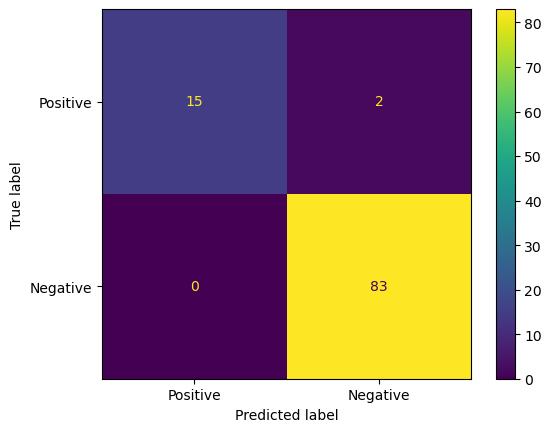

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])
disp.plot()
plt.show()

## 2-8. 了解評估預測精確度的流程

### 將資料集分割成訓練資料與測試資料

In [38]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(features, data_o)
x_train, x_test, y_train, y_test = train_test_split(features, data_o, train_size = 0.75, random_state = 42)

### 利用訓練資料建構模型

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train, y_train)

### 利用測試資料進行評估

In [40]:
from sklearn.metrics import confusion_matrix

# 計算分數
score = clf.score(x_test, y_test)
print("分數:",score)

# 產生混淆矩陣
pred_tree = clf.predict(x_test)
cm = confusion_matrix(y_test, pred_tree, labels=[1,0])
print("混淆矩陣")
print(cm)

分數: 0.88
混淆矩陣
[[ 2  1]
 [ 2 20]]


## 2-9. 比較各種分類演算法

### 與隨機森林演算法比較

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 將資料集分割成訓練資料與評估資料
x_train, x_test, y_train, y_test = train_test_split(features, data_o, train_size = 0.75, random_state = 42)

# 利用訓練資料建立模型
model = RandomForestClassifier(bootstrap=True, n_estimators=20, max_depth=None, random_state = 42)
clf = model.fit(x_train, y_train)

# 利用評估資料進行評估
# 計算分數
score = clf.score(x_test, y_test)
print("分數:",score)

# 產生混淆矩陣
pred_RF = clf.predict(x_test)
cm = confusion_matrix(y_test, pred_RF)
print("混淆矩陣")
print(cm)

分數: 1.0
混淆矩陣
[[22  0]
 [ 0  3]]


### 與SVM比較

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 將資料集分割成訓練資料與評估資料
x_train, x_test, y_train, y_test = train_test_split(features, data_o, train_size = 0.75, random_state = 42)

# 利用訓練資料建立模型
model = SVC(kernel='rbf')
clf = model.fit(x_train, y_train)

# 利用評估資料進行評估
# 計算分數
score = clf.score(x_test, y_test)
print("分數:",score)

# 產生混淆矩陣
pred_SVM = clf.predict(x_test)
cm = confusion_matrix(y_test, pred_SVM)
print("混淆矩陣")
print(cm)

分數: 1.0
混淆矩陣
[[22  0]
 [ 0  3]]


In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 定義模型名稱和模型對象的列表
models = [
    ('SVM', pred_SVM),
    ('Random Forest', pred_RF),
    ('Decision Tree', pred_tree),
]

# 初始化一個空的列表來存儲每個模型的評估指標
metrics_list = []

# 迭代每個模型，計算評估指標
for name, pred in models:
    # 計算評估指標
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # 將結果添加到列表中
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# 將結果轉換為 DataFrame
metrics_df = pd.DataFrame(metrics_list)

# 設置 'Model' 為索引（可選）
metrics_df.set_index('Model', inplace=True)

# 顯示評估指標表格
print(metrics_df)

# 在Colab上用的是Jupyter Notebook，所以可用以下方式更美觀地顯示表格：
display(metrics_df)


               Accuracy  Precision    Recall  F1 Score
Model                                                 
SVM                1.00        1.0  1.000000  1.000000
Random Forest      1.00        1.0  1.000000  1.000000
Decision Tree      0.88        0.5  0.666667  0.571429


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM,1.00,1.0,1.000000,1.000000
Random Forest,1.00,1.0,1.000000,1.000000
Decision Tree,0.88,0.5,0.666667,0.571429


## 2-10. 試著利用支援向量機迴歸法預測具有時序的資料

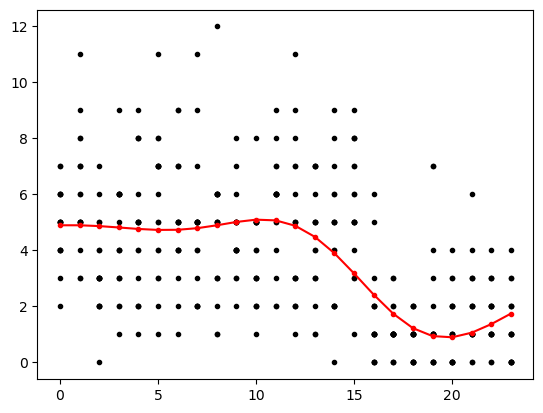

0.3344889011183082

In [44]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# 建立資料
data_target = data_e[data_o==1]
data_y = data_target
data_x = np.stack([np.arange(0,len(data_target[0])) for _ in range(len(data_target))], axis=0)
data_y = np.ravel(data_y)
data_x = np.ravel(data_x)

# 將資料集分割成訓練資料與評估資料
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y)

# 利用訓練資料建立模型（支援向量機迴歸）
model = svm.SVR(kernel='rbf', C=1) # kernel: 'poly', 'rbf', 'linear'
reg = model.fit(x_train.reshape(-1, 1), y_train.ravel())

# 繪製預測曲線
x_pred = np.arange(len(data_target[0])).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.plot(data_x,data_y,"k.")
plt.plot(x_pred,y_pred,"r.-")
plt.show()

# 決定係數R^2
reg.score(x_test.reshape(-1, 1), y_test.ravel())